# Coles Stocks Prices Explore EDA

##### A brief intro about the datasets. ??

##### data source link
https://www.marketindex.com.au/asx/col?src=search-all
https://www.marketindex.com.au/asx/a200

#### Tips
1. Always inspect the data type .info() and data itself .head() to see if the changes are disired. 

## Library

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load data

In [149]:
# The following is a preferable way to import time series data. 

#stocks = pd.read_csv('COL.csv', parse_dates=['Date'], index_col='Date')

# or We will need to change the Date column to datetime, then set the index. (extra steps)

col = pd.read_csv('COL.csv')

### EDA 

In [150]:
col.head()

,Date,Open,High,Low,Close,Volume
0,20181121,12.49,13.37,12.30,12.75,8752527
1,20181122,12.85,12.91,12.21,12.75,5673815
2,20181123,12.75,12.85,12.62,12.84,5474121
3,20181126,12.84,13.30,12.72,13.11,5085525
4,20181127,13.05,13.13,12.75,12.89,6747945


In [151]:
col.info()
# notice that the Dtype of Date is int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1313 non-null   int64  
 1   Open    1313 non-null   float64
 2   High    1313 non-null   float64
 3   Low     1313 non-null   float64
 4   Close   1313 non-null   float64
 5   Volume  1313 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 61.7 KB


In [152]:
# to_datetime to change the Date column to datetime formate. Then set Date as index. 
col['Date'] = pd.to_datetime(col['Date'], format='%Y%m%d')
col.info()
# after dtype transform, it becomes datetime64[ns], but it is still a column not an index yet for the df. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1313 non-null   datetime64[ns]
 1   Open    1313 non-null   float64       
 2   High    1313 non-null   float64       
 3   Low     1313 non-null   float64       
 4   Close   1313 non-null   float64       
 5   Volume  1313 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 61.7 KB


In [153]:
col.set_index('Date', inplace=True)
col.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-11-21,12.49,13.37,12.30,12.75,8752527
2018-11-22,12.85,12.91,12.21,12.75,5673815
2018-11-23,12.75,12.85,12.62,12.84,5474121
2018-11-26,12.84,13.30,12.72,13.11,5085525
2018-11-27,13.05,13.13,12.75,12.89,6747945


In [154]:
col.info()
# Date became index. you will see DatetimeIndex and it is not part of the column anymore. 
# We see the data time range and the number os data entries is 1313

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1313 entries, 2018-11-21 to 2024-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1313 non-null   float64
 1   High    1313 non-null   float64
 2   Low     1313 non-null   float64
 3   Close   1313 non-null   float64
 4   Volume  1313 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 61.5 KB


In [155]:
# clice the close price for analyzing and put it into a dataframe. It is only one column, which makes it series. 
# use to_frame() to turn it to a DataFrame so we can plot it with pandas without lable the y axis. 
# another way is subset the data first before set the Date to index. That way you choose two columns, it will be DataFrame directly.
col_close = col['Close'].to_frame(name='col')
col_close.head(10)

,col
Date,
2018-11-21,12.75
2018-11-22,12.75
2018-11-23,12.84
2018-11-26,13.11
2018-11-27,12.89
2018-11-28,12.70
2018-11-29,12.39
2018-11-30,11.71
2018-12-03,11.62


In [156]:
col_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1313 entries, 2018-11-21 to 2024-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col     1313 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB


<Figure size 1200x800 with 0 Axes>

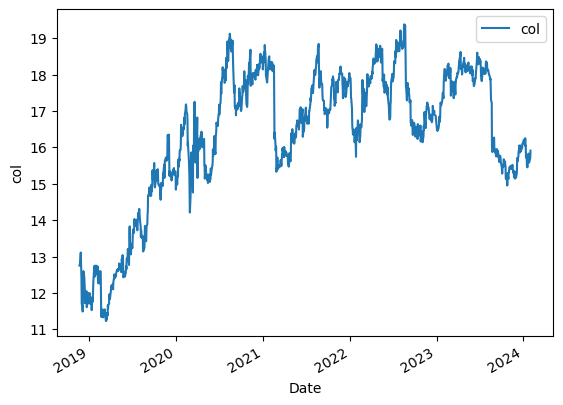

In [157]:
# if you want to define the size of the plot, always put it first before all other ploting code. 
plt.figure(figsize=(12, 8)) 
col_close.plot() # pandas plotting. it will work by itself. 
plt.ylabel('col') # optional, as long as the data is a dataframe and the column has column name. The plot will have axis labels.
plt.show()  # this deosn't require if we didn't use any plt code. pandas plotting doesn't need this to show the plot. 

### Trend, Seasonality and Stationary

Stationarity is a fundamental concept in time series analysis, crucial for many statistical methods and forecasting models. A time series is considered stationary if its statistical properties, such as mean, variance, and autocorrelation, are constant over time. This implies that the series does not exhibit trends, seasonal patterns, or changes in variance over time, making it easier to model and predict.

Seasonality refers to the presence of regular and predictable patterns or cycles in a time series that recur over specific periods, such as daily, weekly, monthly, or yearly.

In [189]:
# Detrend the dataset to find seasonal period
col_diff = col_close.diff().dropna()
col_diff.head()

,col
Date,
2018-11-22,0.00
2018-11-23,0.09
2018-11-26,0.27
2018-11-27,-0.22
2018-11-28,-0.19


<Axes: xlabel='Date'>

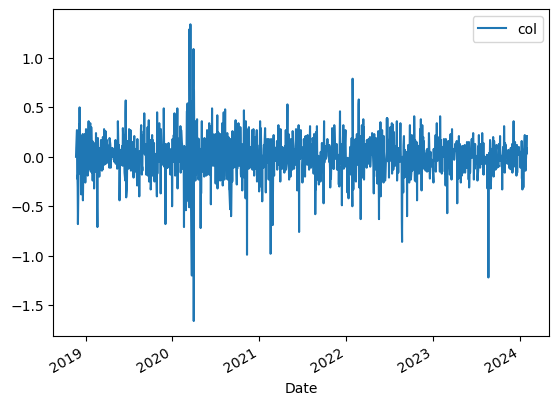

In [190]:
col_diff.plot()

#### ??I often cannot tell the seasonal period from this. maybe i will try monthly data later and see what happens. 
need to learn more about ACF. the shape of ACF means?

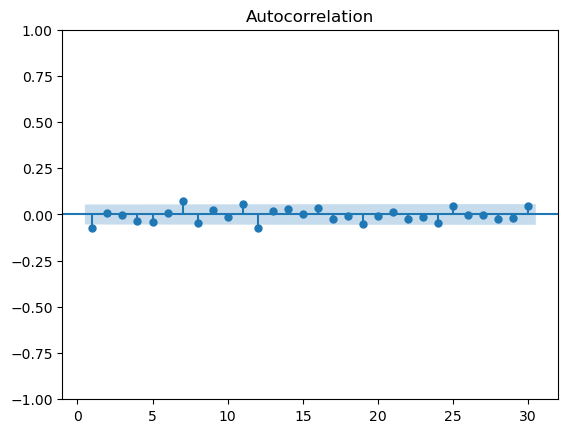

In [191]:
# Find seasonal period using ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(col_diff, lags=30, zero=False)
plt.show()

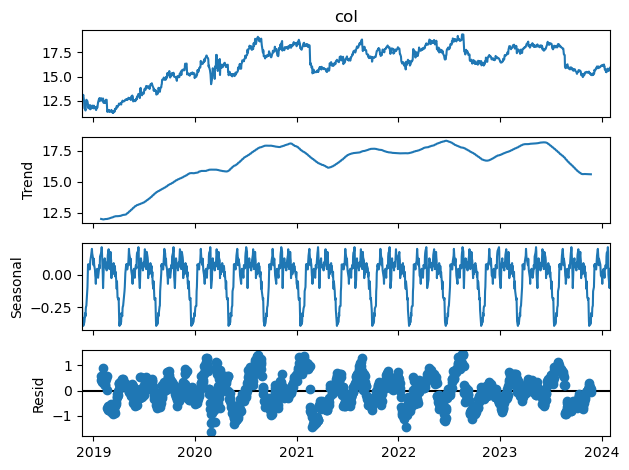

In [192]:
from statsmodels.tsa.seasonal import seasonal_decompose
# decomp_results = seasonal_decompose(col_close['col'], period =90 )
# decomp_results.plot()
# plt.show()
def decompose(data, period):
    decomp_results = seasonal_decompose(data, period=period)
    decomp_results.plot()
    plt.show()

decompose(col_close['col'], 90)
# I just keep changing the period, it is always seasonal. Non-stationary(seasonality + trend). I need to transform the data.

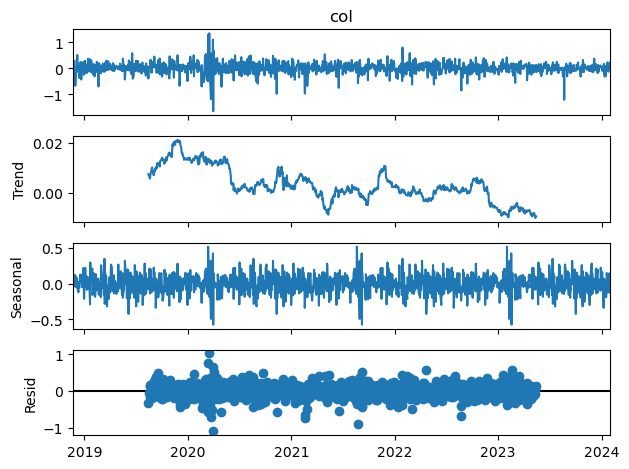

In [193]:
# just take the differencing might help. 
decompose(col_diff['col'], 365)
# after the differencing, it looks stationary. let's use adfuller to check. 

### ADFULLER

In [196]:
#
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(col_diff)
# result[1] #8.452430710497291e-19
# P-value is smaller than 0.05, reject the null hypothesis. The time series is likely stationary

8.452430710497291e-19

In [200]:
# turn it to a function for future use. 
from statsmodels.tsa.stattools import adfuller
def adfullerf(df):
    result = adfuller(df)
    pvalue = result[1]
    if pvalue < 0.05: 
        print("Reject the null hypothesis - The time series is likely stationary.")
    else:
        print("Fail to reject the null hypothesis - The time series is likely non-stationary.")
    #reject means we can use the data to feed the model. 

In [201]:
adfullerf(col_diff)

Reject the null hypothesis - The time series is likely stationary.


### Feed the model. using ARIMA and SARIMA

#### find the parameter - automation

In [216]:
col_close.head()

,col
Date,
2018-11-21,12.75
2018-11-22,12.75
2018-11-23,12.84
2018-11-26,13.11
2018-11-27,12.89


In [228]:
#AR(1)
model_ar1 = ARIMA(col_close, order=(1, 2, 2))
result = model_ar1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    col   No. Observations:                 1313
Model:                 ARIMA(1, 2, 2)   Log Likelihood                 143.212
Date:                Wed, 28 Feb 2024   AIC                           -278.424
Time:                        11:26:11   BIC                           -257.710
Sample:                             0   HQIC                          -270.655
                               - 1313                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9489      0.090    -10.589      0.000      -1.125      -0.773
ma.L1         -0.0446      0.087     -0.515      0.607      -0.214       0.125
ma.L2         -0.9546      0.086    -11.107      0.000      -1.123      -0.786
sigma2         0.0468      0.001     41.782      0.000       0.045       0.049
===================================================================================
Ljung-Box (L1) (Q):                   8.58   Jarque-Bera (JB):              3338.43
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### use acf and pacf to choose model of ar or ma

In [217]:
import pmdarima as pm
result = pm.auto_arima(col_close)
result

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [213]:
# try the model out
from statsmodels.tsa.arima.model import ARIMA
modela11 = ARIMA(col_close, order=(1,1,0))
resultsa11 = modela11.fit()
resultsa11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    col   No. Observations:                 1313
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 150.863
Date:                Wed, 28 Feb 2024   AIC                           -297.727
Time:                        10:52:58   BIC                           -287.368
Sample:                             0   HQIC                          -293.842
                               - 1313                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0757      0.015     -4.917      0.000      -0.106      -0.046
sigma2         0.0465      0.001     53.989      0.000       0.045       0.048
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3082.81
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

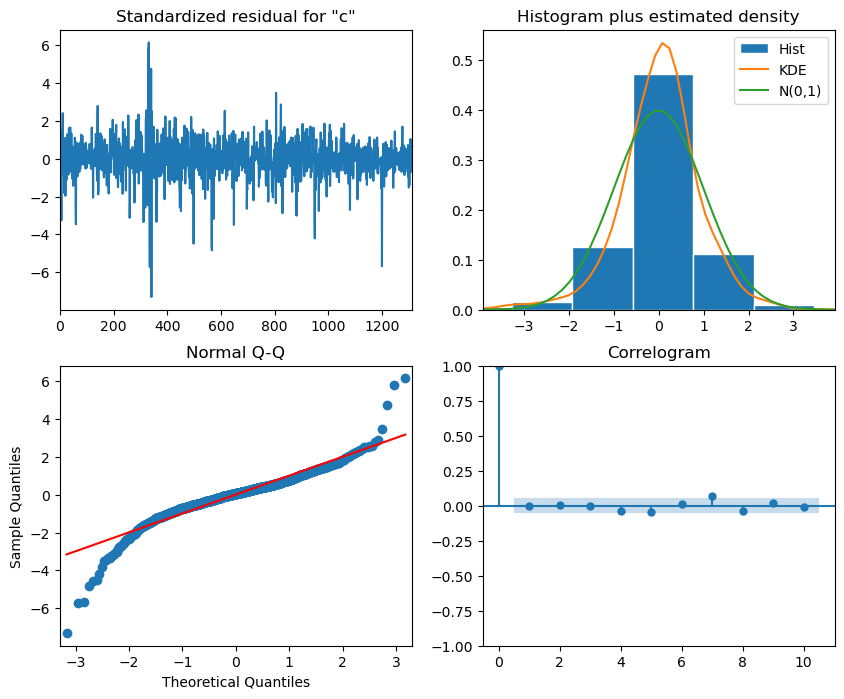

In [215]:
resultsa11.plot_diagnostics(figsize=(10, 8))
plt.show()

In [219]:
returns = col_close.pct_change().dropna()
result_returns = pm.auto_arima(returns)
result_returns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1312
Model:               SARIMAX(1, 0, 0)   Log Likelihood                3791.170
Date:                Wed, 28 Feb 2024   AIC                          -7578.339
Time:                        11:01:35   BIC                          -7567.981
Sample:                             0   HQIC                         -7574.454
                               - 1312                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0754      0.015     -4.880      0.000      -0.106      -0.045
sigma2         0.0002   3.41e-06     53.062      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2759.25
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Lags,changes,and returns for stock price series

In [15]:
stocks_close['shifted'] = stocks_close.shift() # default: periods=1
stocks_close.head()

,Closeprice,shifted
Date,,
2018-11-21,12.75,NaN
2018-11-22,12.75,12.75
2018-11-23,12.84,12.75
2018-11-26,13.11,12.84
2018-11-27,12.89,13.11


In [16]:
stocks_close['lagged'] = stocks_close.Closeprice.shift(periods=-1)
stocks_close.head()

,Closeprice,shifted,lagged
Date,,,
2018-11-21,12.75,NaN,12.75
2018-11-22,12.75,12.75,12.84
2018-11-23,12.84,12.75,13.11
2018-11-26,13.11,12.84,12.89
2018-11-27,12.89,13.11,12.70


In [17]:
stocks_close.tail()

,Closeprice,shifted,lagged
Date,,,
2024-01-24,15.72,15.83,15.58
2024-01-25,15.58,15.72,15.67
2024-01-29,15.67,15.58,15.70
2024-01-30,15.70,15.67,15.91
2024-01-31,15.91,15.70,NaN


In [18]:
stocks_close['changed'] = stocks_close.Closeprice.div(stocks_close.shifted)
stocks_close.head()

,Closeprice,shifted,lagged,changed
Date,,,,
2018-11-21,12.75,NaN,12.75,NaN
2018-11-22,12.75,12.75,12.84,1.000000
2018-11-23,12.84,12.75,13.11,1.007059
2018-11-26,13.11,12.84,12.89,1.021028
2018-11-27,12.89,13.11,12.70,0.983219


In [19]:
stocks_close['returned'] = stocks_close.changed.sub(1).mul(100)
stocks_close.head()

,Closeprice,shifted,lagged,changed,returned
Date,,,,,
2018-11-21,12.75,NaN,12.75,NaN,NaN
2018-11-22,12.75,12.75,12.84,1.000000,0.000000
2018-11-23,12.84,12.75,13.11,1.007059,0.705882
2018-11-26,13.11,12.84,12.89,1.021028,2.102804
2018-11-27,12.89,13.11,12.70,0.983219,-1.678108


In [20]:
stocks_close['diff'] = stocks_close.Closeprice.diff()
stocks_close.head()

,Closeprice,shifted,lagged,changed,returned,diff
Date,,,,,,
2018-11-21,12.75,NaN,12.75,NaN,NaN,NaN
2018-11-22,12.75,12.75,12.84,1.000000,0.000000,0.00
2018-11-23,12.84,12.75,13.11,1.007059,0.705882,0.09
2018-11-26,13.11,12.84,12.89,1.021028,2.102804,0.27
2018-11-27,12.89,13.11,12.70,0.983219,-1.678108,-0.22


In [21]:
stocks_close['pct_change'] = stocks_close.Closeprice.pct_change().mul(100)
stocks_close.head()

,Closeprice,shifted,lagged,changed,returned,diff,pct_change
Date,,,,,,,
2018-11-21,12.75,NaN,12.75,NaN,NaN,NaN,NaN
2018-11-22,12.75,12.75,12.84,1.000000,0.000000,0.00,0.000000
2018-11-23,12.84,12.75,13.11,1.007059,0.705882,0.09,0.705882
2018-11-26,13.11,12.84,12.89,1.021028,2.102804,0.27,2.102804
2018-11-27,12.89,13.11,12.70,0.983219,-1.678108,-0.22,-1.678108


In [22]:
stocks_close['return_3d'] = stocks_close.Closeprice.pct_change(periods=3).mul(100)
stocks_close.head()

,Closeprice,shifted,lagged,changed,returned,diff,pct_change,return_3d
Date,,,,,,,,
2018-11-21,12.75,NaN,12.75,NaN,NaN,NaN,NaN,NaN
2018-11-22,12.75,12.75,12.84,1.000000,0.000000,0.00,0.000000,NaN
2018-11-23,12.84,12.75,13.11,1.007059,0.705882,0.09,0.705882,NaN
2018-11-26,13.11,12.84,12.89,1.021028,2.102804,0.27,2.102804,2.823529
2018-11-27,12.89,13.11,12.70,0.983219,-1.678108,-0.22,-1.678108,1.098039


<Axes: xlabel='Date'>

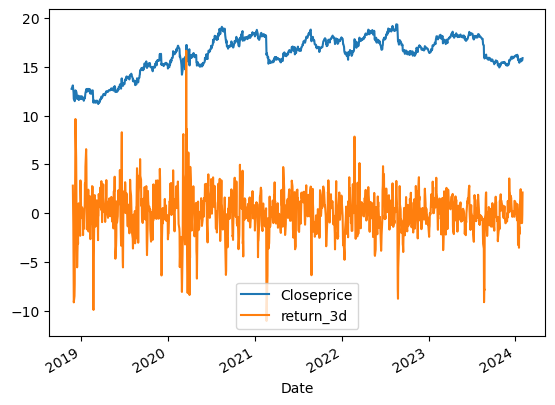

In [23]:
## too many lines and too small. we could just choose a few columns and plot. 
stocks_close[['Closeprice', 'return_3d']].plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

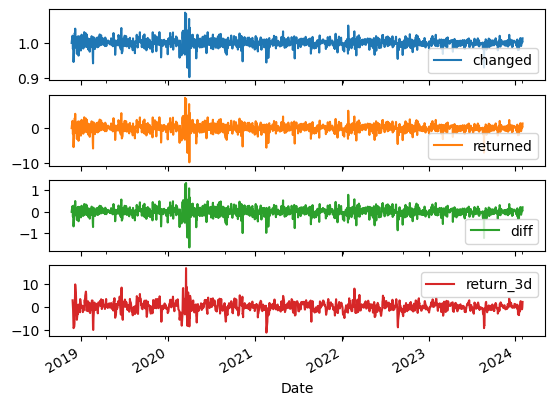

In [24]:
stocks_close[['changed', 'returned', 'diff', 'return_3d']].plot(subplots=True)

###### normalizing, so you can compare different stocks price and also compare with bench marks. 

In [25]:
prices = stocks_close['Closeprice'].to_frame(name='col')
prices.head()

,col
Date,
2018-11-21,12.75
2018-11-22,12.75
2018-11-23,12.84
2018-11-26,13.11
2018-11-27,12.89


In [26]:
firstrow = prices.iloc[0]
firstrow

col    12.75
Name: 2018-11-21 00:00:00, dtype: float64

In [27]:
normalized = prices.div(firstrow).mul(100)
normalized.head()

,col
Date,
2018-11-21,100.000000
2018-11-22,100.000000
2018-11-23,100.705882
2018-11-26,102.823529
2018-11-27,101.098039


<Axes: xlabel='Date'>

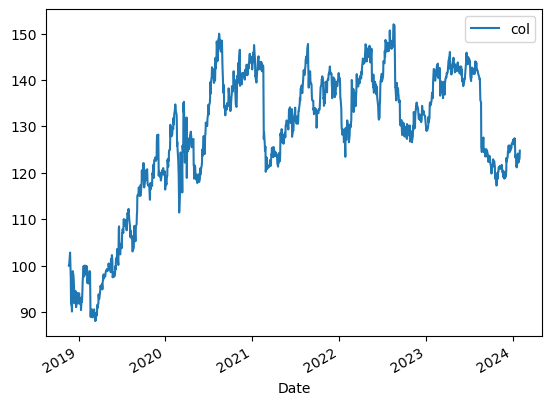

In [28]:
normalized.plot()

In [29]:
A200 = pd.read_csv('A200.csv', parse_dates=['Date'], index_col='Date')
A200.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1453 entries, 2018-05-08 to 2024-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1453 non-null   float64
 1   High    1453 non-null   float64
 2   Low     1453 non-null   float64
 3   Close   1453 non-null   float64
 4   Volume  1453 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 68.1 KB


In [30]:
A200.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-05-08,100.74,100.77,100.74,100.74,5064
2018-05-09,100.65,100.84,100.50,100.77,9577
2018-05-10,101.38,101.38,100.98,101.01,2498
2018-05-11,101.13,101.27,100.91,100.91,6466
2018-05-14,101.26,101.41,101.26,101.41,89204


In [31]:
A200.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [32]:
A200 = A200['Close'].to_frame(name='A200')
A200.head()

,A200
Date,
2018-05-08,100.74
2018-05-09,100.77
2018-05-10,101.01
2018-05-11,100.91
2018-05-14,101.41


In [33]:
A200min = A200.index.min()
A200min

Timestamp('2018-05-08 00:00:00')

In [34]:
A200max = A200.index.max()
A200max

Timestamp('2024-01-31 00:00:00')

In [35]:
priceindex = pd.concat([prices, A200], axis=1).dropna()
priceindex.head()

,col,A200
Date,,
2018-11-21,12.75,94.56
2018-11-22,12.75,95.25
2018-11-23,12.84,95.78
2018-11-26,13.11,95.01
2018-11-27,12.89,95.95


In [36]:
# normalize together. 
firstprice = priceindex.iloc[0]

In [37]:
normalized_pi = priceindex.div(priceindex.iloc[0]).mul(100)
normalized_pi.head()

,col,A200
Date,,
2018-11-21,100.000000,100.000000
2018-11-22,100.000000,100.729695
2018-11-23,100.705882,101.290186
2018-11-26,102.823529,100.475888
2018-11-27,101.098039,101.469966


In [38]:
normalized_pi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1313 entries, 2018-11-21 to 2024-01-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col     1313 non-null   float64
 1   A200    1313 non-null   float64
dtypes: float64(2)
memory usage: 30.8 KB


<Axes: xlabel='Date'>

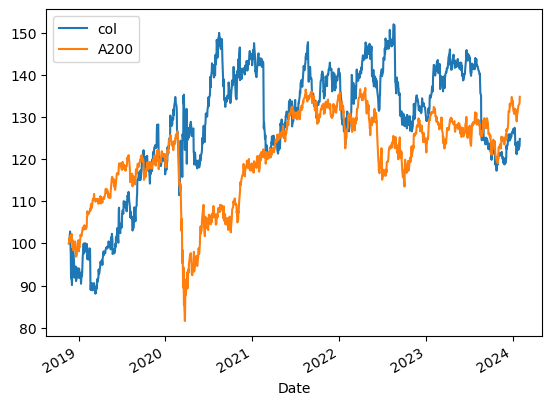

In [39]:
normalized_pi.plot()

In [40]:
monthly = normalized_pi.resample('M').mean()
monthly.head()

,col,A200
Date,,
2018-11-30,99.156863,100.964996
2018-12-31,93.671827,99.568361
2019-01-31,95.219421,102.235920
2019-02-28,94.823529,107.460871
2019-03-31,90.416433,110.333575


In [41]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2018-11-30 to 2024-01-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col     63 non-null     float64
 1   A200    63 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


<Axes: xlabel='Date'>

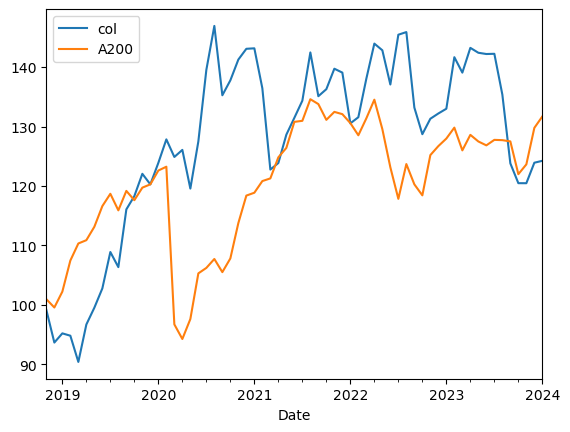

In [42]:
monthly.plot()

In [43]:
rolling30 = normalized_pi.rolling(window=30).mean().add_suffix('_rolling')
rolling30.head(35)

,col_rolling,A200_rolling
Date,,
2018-11-21,NaN,NaN
2018-11-22,NaN,NaN
2018-11-23,NaN,NaN
2018-11-26,NaN,NaN
2018-11-27,NaN,NaN
2018-11-28,NaN,NaN
2018-11-29,NaN,NaN
2018-11-30,NaN,NaN
2018-12-03,NaN,NaN


In [44]:
mix = pd.concat([normalized_pi, rolling30], axis=1)
mix.head(35)

,col,A200,col_rolling,A200_rolling
Date,,,,
2018-11-21,100.000000,100.000000,NaN,NaN
2018-11-22,100.000000,100.729695,NaN,NaN
2018-11-23,100.705882,101.290186,NaN,NaN
2018-11-26,102.823529,100.475888,NaN,NaN
2018-11-27,101.098039,101.469966,NaN,NaN
2018-11-28,99.607843,101.332487,NaN,NaN
2018-11-29,97.176471,102.009306,NaN,NaN
2018-11-30,91.843137,100.412437,NaN,NaN
2018-12-03,91.137255,102.241963,NaN,NaN


<Axes: xlabel='Date'>

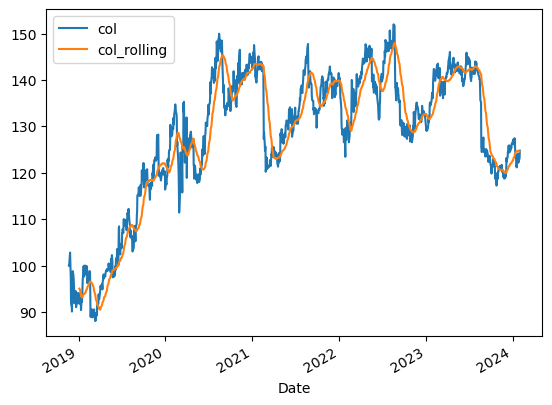

In [45]:
mix[['col', 'col_rolling']].plot()

<Axes: xlabel='Date'>

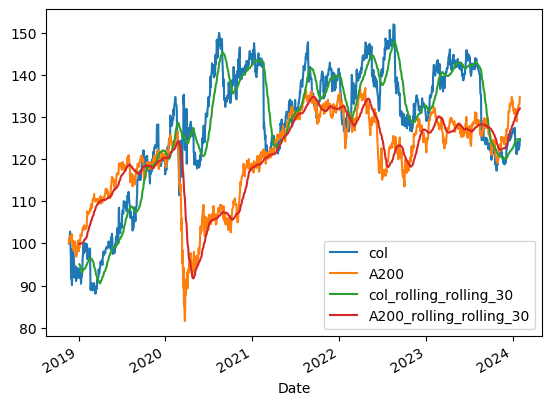

In [46]:
normalized_pi.join(rolling30.add_suffix('_rolling_30')).plot()

In [47]:
expandingsum = normalized_pi.expanding().sum()
expandingsum.head()

,col,A200
Date,,
2018-11-21,100.000000,100.000000
2018-11-22,200.000000,200.729695
2018-11-23,300.705882,302.019882
2018-11-26,403.529412,402.495770
2018-11-27,504.627451,503.965736


<Axes: xlabel='Date'>

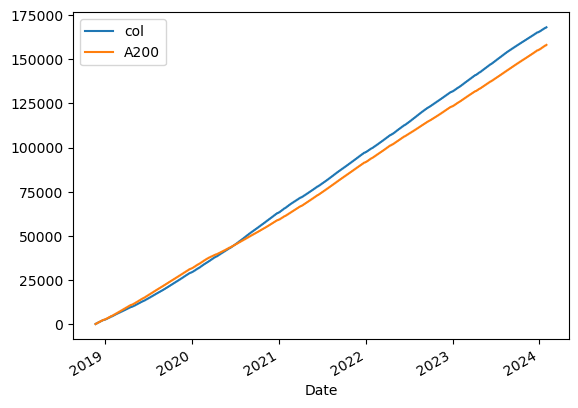

In [48]:
expandingsum.plot()

In [49]:
cumsum = normalized_pi.cumsum()
cumsum.head()

,col,A200
Date,,
2018-11-21,100.000000,100.000000
2018-11-22,200.000000,200.729695
2018-11-23,300.705882,302.019882
2018-11-26,403.529412,402.495770
2018-11-27,504.627451,503.965736


<Axes: xlabel='Date'>

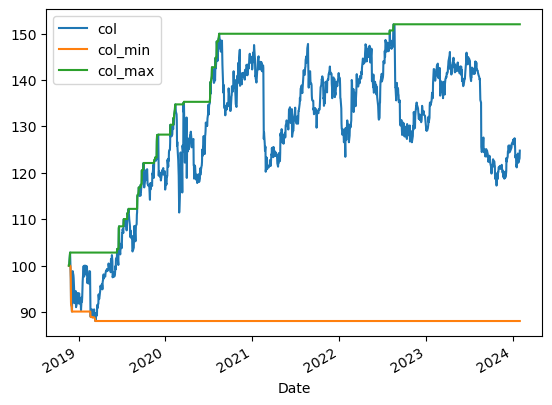

In [50]:
normalized_min = normalized.expanding().min().add_suffix('_min')
normalized_max = normalized.expanding().max().add_suffix('_max')
pd.concat([normalized, normalized_min, normalized_max], axis=1).plot()

In [51]:
dailyreturn = priceindex.pct_change()
dailyreturn.head()

,col,A200
Date,,
2018-11-21,NaN,NaN
2018-11-22,0.000000,0.007297
2018-11-23,0.007059,0.005564
2018-11-26,0.021028,-0.008039
2018-11-27,-0.016781,0.009894


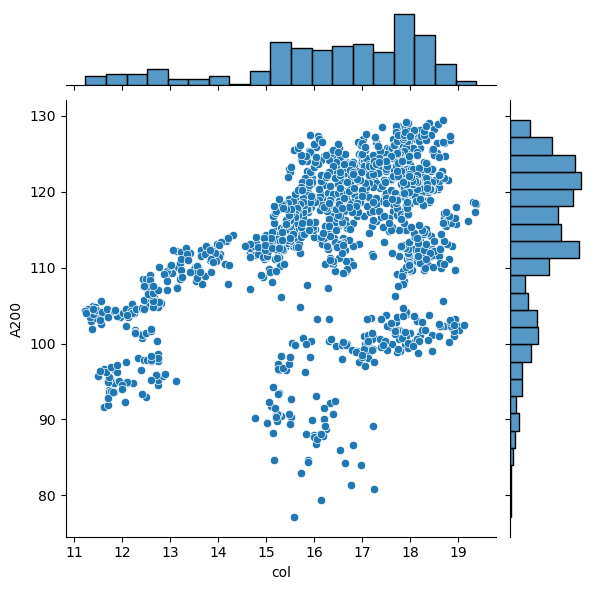

In [52]:
sns.jointplot(x='col', y='A200', data=priceindex)

In [53]:
correlations = priceindex.corr()

<Axes: >

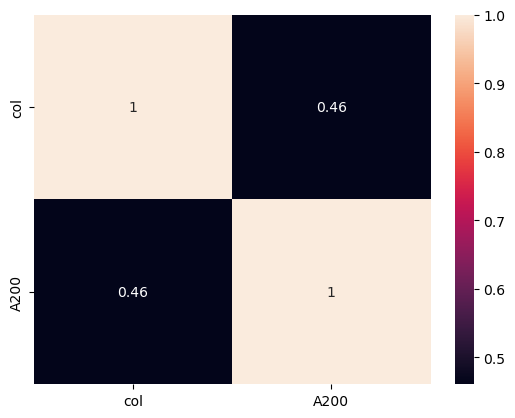

In [54]:
sns.heatmap(correlations, annot=True)

In [60]:
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

In [59]:
prices.head()

,col
Date,
2018-11-21,12.75
2018-11-22,12.75
2018-11-23,12.84
2018-11-26,13.11
2018-11-27,12.89


In [75]:
decomposition = sm.tsa.seasonal_decompose(prices['col'], period=30)
print(decomposition.seasonal)

Date
2018-11-21   -0.015183
2018-11-22   -0.067637
2018-11-23   -0.081339
2018-11-26   -0.097424
2018-11-27   -0.045273
                ...   
2024-01-24    0.109758
2024-01-25    0.018708
2024-01-29    0.001944
2024-01-30    0.033828
2024-01-31    0.040402
Name: seasonal, Length: 1313, dtype: float64


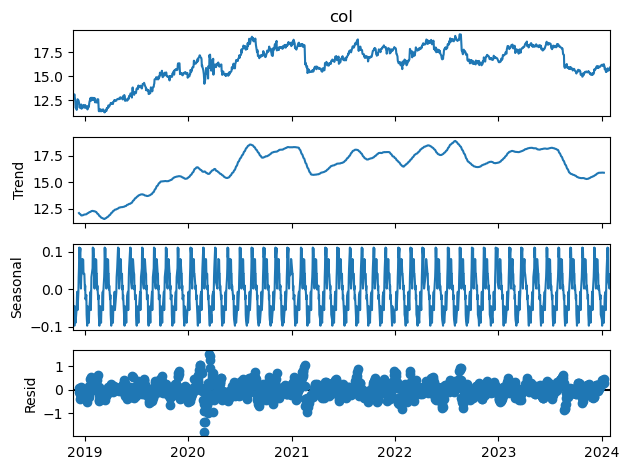

In [76]:
fig = decomposition.plot()

In [77]:
priceindex.head()

,col,A200
Date,,
2018-11-21,12.75,94.56
2018-11-22,12.75,95.25
2018-11-23,12.84,95.78
2018-11-26,13.11,95.01
2018-11-27,12.89,95.95


<Axes: xlabel='Date'>

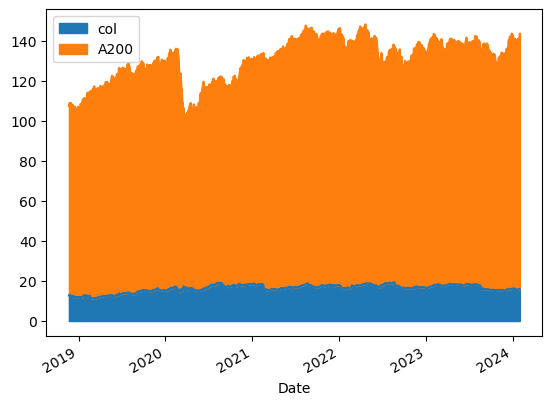

In [78]:
priceindex.plot.area()